In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('/Users/hayeon/Downloads/전체데이터.xlsx')

In [8]:
data=data.fillna(0)

In [3]:
np.corrcoef(data['PM10(bj)'], data['PM10 (ug/m3)'])

array([[1.        , 0.24379142],
       [0.24379142, 1.        ]])

In [4]:
np.corrcoef(data['PM2.5(bj)'], data['PM10(bj)'])

array([[1.       , 0.5836876],
       [0.5836876, 1.       ]])

In [5]:
np.corrcoef(data['PM2.5(bj)'], data['PM2.5 (ug/m3)'])

array([[1.        , 0.27454474],
       [0.27454474, 1.        ]])

In [10]:
np.corrcoef(data['O3 (ppm)'], data['PM10 (ug/m3)'])

array([[ 1.        , -0.06539478],
       [-0.06539478,  1.        ]])

In [18]:
print('S02 - 대전미세먼지 상관계수','\n',
      np.corrcoef(data['SO2 (ppm)'], data['PM10 (ug/m3)']))
#plt.figure(figsize=(5,5))
#plt.scatter(data['SO2 (ppm)'], data['PM10 (ug/m3)'])

S02 - 대전미세먼지 상관계수 
 [[1.         0.42294317]
 [0.42294317 1.        ]]


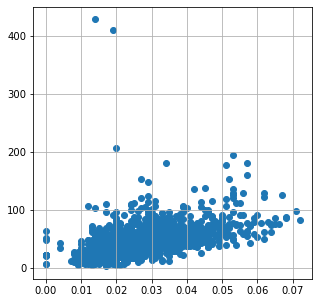

In [21]:
np.corrcoef(data['NO2 (ppm)'], data['PM10 (ug/m3)'])
plt.figure(figsize=(5,5))
plt.scatter(data['NO2 (ppm)'], data['PM10 (ug/m3)'])
plt.grid()
plt.show()

In [12]:
np.corrcoef(data['CO (ppm)'], data['PM10 (ug/m3)'])

array([[1.        , 0.54620834],
       [0.54620834, 1.        ]])

In [13]:
np.corrcoef(data['PM10(tg)'], data['PM10 (ug/m3)'])

array([[1.        , 0.35786914],
       [0.35786914, 1.        ]])

---

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
X_pm10=data.drop(['date','PM10 (ug/m3)'], axis=1)

In [27]:
y_pm10 = data['PM10 (ug/m3)']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_pm10, y_pm10)

In [31]:
X_test.shape, X_train.shape

((373, 15), (1118, 15))

In [32]:
y_test.shape, y_train.shape

((373,), (1118,))

---

In [36]:
# Scaler 
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [43]:
reg = KNeighborsRegressor(n_neighbors=1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error
print(np.mean(y_test==y_pred))

0.00804289544235925


In [45]:
reg2 = KNeighborsRegressor(n_neighbors=1, weights='uniform')
reg2.fit(X_train, y_train)
y_pred2 = reg.predict(X_test)

In [51]:
r2 = r2_score(y_test, y_pred)
print('r2: ', r2)
print('accuracy', np.mean(y_test == y_pred))

r2:  0.011906087604892424
accuracy 0.00804289544235925


In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.00804289544235925


In [58]:
data_s=pd.read_excel('/Users/hayeon/Downloads/전체데이터.xlsx')

In [92]:
data_s=data_s.fillna(0)

In [105]:
from pandas import get_dummies
#pd.get_dummies(data_s['계절'])
season_ohe=pd.get_dummies(data_s['계절'])

In [106]:
data=data.fillna(0)

In [107]:
X_season=pd.concat([season_ohe,data_s[['SO2 (ppm)','NO2 (ppm)','CO (ppm)']]], axis=1)

In [108]:
y=data_s[['PM10 (ug/m3)']]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_season, y)

In [110]:
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [111]:
y_pred = reg.predict(X_test)

In [112]:
print(np.mean(y_test == y_pred))

PM10 (ug/m3)    0.034853
dtype: float64


In [104]:
data_s.계절.unique()

array(['여름', '가을', '겨울', '봄'], dtype=object)